
# Projekt *Learning und Softcomputing* - Sommersemester 2023
## Vorhersage von Flugpreisen 
**Gruppe 04**
- Marisa Sophie Heinemann (DSAI 105714)
- Timo Kranz (ITS 105862)

**Daten**

Der Datensatz verfügt über Daten für One-Way Flüge, die zwischen dem 16.04.2022 und dem 05.10.2022 auf Expedia gefunden wurden. Bereitgestellt wurde dieser von *Dillon Wong* auf [Kaggle](https://www.kaggle.com/datasets/dilwong/flightprices) sowie auf [GitHub](https://github.com/dilwong/FlightPrices). Eine weitere Beschreibung zu diesem finden Sie unter dem Punkt *2. Beschreibung Datensatzes*.

**Aufgabenbeschreibung**

Ziel des zu entwickelnden Modelles ist es auf Basis von verschiedenen Parametern einen Flugpreis vorherzusagen. 

**Aufbau dieses Notebooks**
1. Hinweise zur Durchführung des Projektes
2. Beschreibung des Datensatzes
3. Benötigte Pakete
4. Feature Engineering
5. Exploritory Data Analysis

## 1. Hinweise zur Durchführung des Projektes

Die praktische Übung zum Thema Maschine Learning kann mit [Jupyter Notebook](http://jupyter.org/) und [Scikit-Learn](http://scikit-learn.org/) durchgeführt werden. Wir verwenden die Google-Plattform [Colab](https://colab.research.google.com), die Jupyter Notebooks in der Cloud hostet. Dafür haben wir uns ein gemeinsames Konto angelegt. Dies ist allerdings keine Voraussetzung, da wir auch mit unterschiedlichen Konten gemeinsam an diesem Projekt arbeiten können. 


### Environment
Sollte eine lokale Nuzung auf dem Computer gewünscht sein, um eine Berechnung ohne Netzzugang durchzuführen. Geht dies am besten über die Distribution Miniconda. (Mini)conda ist der Package Manager von Anaconda und ist somit eine Konsolen Applikation. Anaconda ist eine visuelles Front-End für (mini)conda. (Mini/Ana)Conda erlaubt uns die gleiche Umgebung auf jedem Rechner zu erstellen. Wir haben uns für Conda entschieden, da dieses eines der am meisten verwendeten Package Management Systems für Data Science und Machine Learning ist.  Für die Intstallation siehe die offizielle Website von [Miniaconda](https://docs.conda.io/en/latest/miniconda.html). Für die Erstellung der Enviroment haben wir eine .yml-Datei mit einer Liste aller benötigten Packages erstellt. Dieses finden Sie im [Moodle](https://lms.fh-wedel.de/course/view.php?id=207). Speichern Sie diese Datei auf Ihrem Rechner unter den Namen 'learning_env.yml' ab.
Öffne Sie an dem Ort wo die Datei liegt eine Konsole. Um das Enviorment zu erstellen führen Sie folgenden Link aus:

-  *conda env create -f learning_env.yml*

Die Erstellung kann einige Minuten dauern. Aktivieren Sie anschließend das Enviroment in der Konsole.


- *conda activate learning_env*

learning_env steht hier für den in unserem Enviorment verwendetetn Namen in der ersten Zeile und nicht für den Datei Namen. Gehen Sie deshalb sicher, dass Sie nichts an der Datei verändert haben.
Anschließend kann das Python Skript lokal durchgeführt werden.

# Todo Link von Moodle
Dieses Jupyter-Notebook finden Sie im [Moodle](https://lms.fh-wedel.de/course/view.php?id=207). 


Starten Sie dazu bitte [Colab](https://colab.research.google.com), in dem Sie mit dem Web-Browser auf https://colab.research.google.com gehen, wählen Sie dann *Upload Notebook* aus dem *File*-Menü und laden Sie bitte das File  *projekt_learning_und_softcomputing_gruppe04.ipynb* hoch. Um das Notebook sinvoll verwenden zu können ist es nötig die Daten im Drive abzulegen.


## 2. Beschreibung des Datensatzes 

Der Datensatz enthält Informationen zu One-Way-Flügen, die zwischen dem *16.04.2022* und *05.10.2022* auf Expedia verfügbar waren. Er besteht aus *27 verschiedenen Featuren* und umfasst insgesamt *5.999.739 Datenpunkte*.
Jede Zeile stellt einen Datensatz für einen auf Expedia gefundenen Flug dar. Ein und derselbe Flug kann in mehreren Zeilen erscheinen, da sich der Preis täglich ändern kann.
Ingesammt umfasst der Datensatz eine 30 GB CSV-Datei. Zu beachten ist, dass der Datensatz ausschließlich Flüge zu und von US-Flughäfen umfasst. Diese enthaltenden Flughäfen haben folgende Kürzel:  ATL, DFW, DEN, ORD, LAX, CLT, MIA, JFK, EWR, SFO, DTW, BOS, PHL, LGA, IAD, OAK


Die Fetures werden in der folgenden Tabelle näher beschrieben.	 


| Feature                               | Beschreibung                                                                                   |
|---------------------------------------|-----------------------------------------------------------------------------------------------|
| legId                                 | Eine Kennung für den Flug.                                                                    |
| searchDate                            | Das Datum (JJJJ-MM-TT), an dem dieser Eintrag von Expedia übernommen wurde.                    |
| flightDate                            | Das Datum (JJJJ-MM-TT) des Fluges.                                                             |
| startingAirport                       | Dreistelliger IATA-Flughafencode für den Abflugort.                                            |
| destinationAirport                    | Dreistelliger IATA-Flughafencode für das Ziel.                                                 |
| fareBasisCode                         | Der Tarifbasiscode.                                                                            |
| travelDuration                        | Die Reisedauer in Stunden und Minuten.                                                        |
| elapsedDays                           | Die Anzahl der vergangenen Tage (normalerweise 0).                                             |
| isBasicEconomy                        | Boolescher Wert, ob das Ticket für Basic Economy gilt.                                         |
| isRefundable                          | Boolescher Wert, ob das Ticket erstattungsfähig ist.                                           |
| isNonStop                             | Boolescher Wert, ob der Flug nonstop ist.                                                      |
| baseFare                              | Der Preis des Tickets (in USD).                                                                |
| totalFare                             | Der Preis des Tickets (in USD), einschließlich Steuern und Gebühren.                           |
| seatsRemaining                        | Ganzzahl für die Anzahl der verbleibenden Plätze.                                              |
| totalTravelDistance                   | Die Gesamtreisedistanz in Meilen. Diese Daten können manchmal fehlen.                         |
| segmentsDepartureTimeEpochSeconds     | Zeichenkette mit der Abflugzeit (Unix-Zeit) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch '&#124;&#124;'  getrennt.|
| segmentsDepartureTimeRaw              | Zeichenkette mit der Abflugzeit (ISO 8601-Format: JJJJ-MM-TTThh:mm:ss.000±[hh]:00) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsArrivalTimeEpochSeconds       | Zeichenkette mit der Ankunftszeit (Unix-Zeit) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsArrivalTimeRaw                | Zeichenkette mit der Ankunftszeit (ISO 8601-Format: JJJJ-MM-TTThh:mm:ss.000±[hh]:00) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch '&#124;&#124;' getrennt.|
| segmentsArrivalAirportCode            | Zeichenkette mit dem IATA-Flughafencode für das Ziel für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsDepartureAirportCode          | Zeichenkette mit dem IATA-Flughafencode für den Abflugort für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsAirlineName                   | Zeichenkette mit dem Namen der Fluggesellschaft, die jeden Flugabschnitt bedient. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;' getrennt.|
| segmentsAirlineCode                   | Zeichenkette mit dem zweistelligen Fluggesellschaftscode, der jeden Flugabschnitt bedient. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsEquipmentDescription          | Zeichenkette mit dem Typ des für jeden Flugabschnitt verwendeten Flugzeugs (z.B. "Airbus A321" oder "Boeing 737-800"). Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;' getrennt.|
| segmentsDurationInSeconds             | Zeichenkette mit der Dauer des Fluges (in Sekunden) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsDistance                      | Zeichenkette mit der zurückgelegten Strecke (in Meilen) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsCabinCode                     | Zeichenkette mit der Kabine für jeden Flugabschnitt (z.B. "Economy"). Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|


Unteranderem hatten folgende Argumente einen positiven Einfluss auf den Datensatz, so dass wir uns entschieden haben diesen für unser Projekt zu verwenden:
- Viele Features 
- Interessante Features wie exaktes Datum und Anzahl übrige Sitzplätze 
- Sehr großer Datensatz
- Persönliches Interesse an Flugdaten

## Aufbau des Notebooks

Um die spezifischen Commands an die unterschiedlichen Umgebungen anzupassen, werden folgt boolean initianlisiert. Diese können  nach belieben auf true oder falsch gesetzt werden.
Ansließend kann das Command *'Run All'* verwendet werden ohne gefahr zu verlaufen, dass Comands ausgeführt werden, die zu fehlermeldungen führen können oder die aufgrund ineffizienter Ausführung nicht immer ausgeführt werden sollen. 


In [1]:
# boolean for debugging 
debug = True

# boolean for running google colab comands
colab = False

Verknüpfung mit Drive um auf die Daten zugreifen zu können.

In [ ]:
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

CPU verbdinung herstellen

In [ ]:
if colab:
    #@markdown Check type of GPU and VRAM available.
    !nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

## Vorbereitung der Daten

Zu Beginn unserer Arbeit mussten wir den Datensatz minimieren, da unser lokaler Speicher und die Cloud Kapazitäten nicht groß genung waren um den 30 GB großen Datensatz zu verarbeiten.
Dafür haben wir den folgenden Code verwendet, diese hat zufällige Dateneinträge aus der Datei gezogen und in eine neue Datei geschrieben. 
Mit dieser neuen Datei werden wir folgend das Projekt durchhführen. 
Die Datei hat nur unikate Datensätze, ist 276 MB groß und hat 757385 Datenpunkte. 

Zur Reduzierung haben wir folgenden Code durchgeführt.



    import random
    import csv

    def halve_csv_file(input_file, output_file):
    # Anzahl der Zeilen in der CSV-Datei ermitteln
    with open(input_file, 'r') as file:
        num_lines = sum(1 for line in file)

    # Anzahl der Zeilen für die Ausgabe festlegen
    num_output_lines = num_lines // 2

    # Zufällige Auswahl von Zeilen erstellen
    selected_lines = sorted(random.sample(range(1, num_lines + 1), num_output_lines))

    with open(input_file, 'r') as input_csv, open(output_file, 'w', newline='') as output_csv:
        reader = csv.reader(input_csv)
        writer = csv.writer(output_csv)

        # Ausgewählte Zeilen in die Ausgabedatei schreiben
        for i, row in enumerate(reader, start=1):
            if i in selected_lines:
                writer.writerow(row)

    print(f"Die Datei wurde halbiert. Ursprüngliche Zeilen: {num_lines}, Ausgewählte Zeilen: {num_output_lines}")

    input_file = "C:/Users/maris/OneDrive/Dokumente/Learning und Soft/df.csv"
    output_file = 'halbierte_datei.csv'
    halve_csv_file(input_file, output_file)


## 3. Benötigte Pakete



In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #Regex

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler



## 4. Feature Engineering 

Die vorhandenen Daten sind möglicherweise nicht direkt für den Einsatz von Machine-Learning-Algorithmen geeignet. Es gibt mehrere Gründe dafür:
- Die Art der Features ist möglicherweise ungeeignet.
- Die Wertebereiche der Features können variieren.
- Die Zusammenhänge zwischen den Features sind möglicherweise schwer zu erkennen.

Um diese Herausforderungen anzugehen, werden wir zunächst Feature Engineering durchführen. 

In [3]:
if colab:
    csv_path = "/content/drive/MyDrive/Colab Notebooks/dataset_flight_prices.csv"
else:
    csv_path ="C:/Users/maris/OneDrive/Dokumente/Learning und Soft/dataset_flight_prices.csv"
df = pd.read_csv(csv_path)

## 4.1 Sichtung des Datensatzes

1. Top 5 Data

In [ ]:
df.head(5)

2. Form der Daten

In [ ]:
print('Die Daten haben ein Verhältnis von:' , df.shape)

3. Weitere Information zum Datensatz

In [ ]:
df.info()
#df.dtypes

4. Untersuchung auf *NAN* und *Null* Werten

In [ ]:
#Checking number of NULL values
print('Der Datensatz weißt folgende Summe an fehlenden Werten auf:')
df.isnull().sum()
#df.isna().sum()


In [4]:
# NA-Werte fallen lassen
# Da nur einige Werte fehlen, werden diese gestrichen
df.dropna(inplace=True)

5. Überprüfung auf Dublikaten

In [5]:
dublicates = df.duplicated().sum()

if (dublicates > 0):
    print('Es gab '+ dublicates + 'Dublicates. Diese wurden gelöscht.' )
    # Löschen von Dublicaten
    df.drop_duplicates(inplace=True)

## 4.2 Feature Extraktion

### a) Kreieren des Features 'travelDurationMinutes'
Dieses Feature gibt die Flugdauer in Minuten an

In [6]:
# Funktion zur Umwandlung der als Objekt gespeicherten Dauer in Minuten als int
def convert_duration(duration):
    """
    Funktion zur Umwandlung einer als Objekt gespeicherten Dauer in Minuten als Ganzzahl (int).

    Parameter:
    - duration: Zeichenkette, die die Dauer im Format 'PT[Stunde]H[Minuten]M' angibt.

    Rückgabewert:
    - total_minutes: Dauer in Minuten als Ganzzahl (int).
    """
    hours = int(re.findall(r'(\d+)H', duration)[0]) if 'H' in duration else 0
    minutes = int(re.findall(r'(\d+)M', duration)[0]) if 'M' in duration else 0
    total_minutes = hours * 60 + minutes
    return total_minutes

In [7]:
# Die Spalte 'travelDuration' hat das Format "PT2H29M", das wir in einen numerischen Wert umwandeln müssen
# Anschließend erstellen wir eine neue Spalte "travelDurationMinutes".
df['travelDurationMinutes'] = df['travelDuration'].apply(convert_duration)

### b) Krieren von Features zu Datumsangaben

Konvertierung der Spalte Dates vom Objekt- ins Datetime-Format

In [8]:
df['flightDate'] = pd.to_datetime(df['flightDate'])
df['searchDate'] = pd.to_datetime(df['searchDate'])

Extrahieren der numerischen Komponenten aus der Spalte datetime. Monat und Tag sind Integerwerte, aber der Monat ist kein quantitativer Wert, daher wird er in einen String umgewandelt.

Da unser Datensatz nur Flüge aus dem Jahr 2022 aufweist, wird das Jahr folgend nicht weiter betrachtet und es wird kein eigenes Feaure dazu erstellt.
Dadruch dass jedes Feature den gleichen Wert aufweisen würde, könnten wir keine Information aus diesem Feautre erhalten.

Ist das später gewünscht, könnte der Code wie folgt aussehen:

df['searchYear'] = df['searchDate'].dt.year 

df['year'] = df['flightDate'].dt.year

In [9]:
df['searchMonth'] = df['searchDate'].dt.month.astype(str)
df['searchDay'] = df['searchDate'].dt.day.astype(str)
df['flightMonth'] = df['flightDate'].dt.month.astype(str)
df['flightDay'] = df['flightDate'].dt.day.astype(str)

Abgeleitung des Merkmales Wochentag

In [10]:
def safeDay(data, column, newColumn):
    """
    Funktion zum Extrahieren des Wochentags aus einem Datumsspalte und Speichern des Ergebnisses in einer neuen Spalte.

    Parameter:
    - data: Pandas DataFrame, der die Daten enthält.
    - column: Name der Spalte im DataFrame, die das Datum enthält.
    - newColumn: Name der neuen Spalte, in der der Wochentag gespeichert werden soll.

    Hinweise:
    - Der ursprüngliche DataFrame `data` wird direkt verändert, es wird keine neue Kopie erstellt.
    """
    data[newColumn] = pd.to_datetime(data[column]).dt.strftime('%A')

# Erstellen eines neuen Features, der den Tag des Tages präsentiert
safeDay(df, 'flightDate', 'flightDateDay')
safeDay(df, 'searchDate', 'searchDateDay')

### c) Ableitung des Features 'daysLeft'
*Abgeleitete Merkmale*

Um Abhängigkeiten zwischen bestehenden Merkmalen auszudrücken, werden kombinierte Merkmale eingeführt. 
Folgend berechnen wir die Anzahl der verbleibenden Tage und erstellen eine neue Spalte 'daysLeft' als int.

In [11]:
df['daysLeft'] = (df['flightDate'] - df['searchDate']).dt.days.astype(int)

### d) Extrahieren der Ankunfts- und Ablfugszeit 

Da ein Flug mehrere Zwischenstopps enthalten kann, kann es sein, dass die Zeichenkette mehrere Zeiten anzeigt.
Wir sind nur an den Stunden und Minuten interessiert.
Für die Ankunftszeit wollen wir immer die letzte Zeit.
Für den Abflug wollen wir immer die erste Zeit.
Folgend Suchen wir uns diese Zeiten mit einem Regex heraus.

In [12]:
def extract_time(time_string, pattern):
    """
    Funktion zum Extrahieren von Uhrzeiten aus einem Zeichenfolgenmuster.

    Parameter:
    - time_string: Zeichenkette, aus der die Uhrzeit extrahiert werden soll.
    - pattern: Das reguläre Ausdrucksmuster (Regex), das zur Extraktion der Uhrzeit verwendet wird.

    Rückgabewert:
    - extracted_time: Extrahierte Uhrzeit als Gleitkommazahl. Im Falle einer erfolgreichen Extraktion wird die Uhrzeit zurückgegeben.
                      Falls keine Übereinstimmung gefunden wird, wird None zurückgegeben.

    Hinweise:
    - Das `pattern` sollte ein regulärer Ausdruck (Regex) sein, der die gewünschte Uhrzeit in der `time_string` erfasst.
    - Die Funktion verwendet die `re`-Bibliothek, um das Muster in der `time_string` zu suchen und die Uhrzeit zu extrahieren.
    - Die extrahierte Uhrzeit wird als Gleitkommazahl zurückgegeben, wobei Stunden und Minuten durch einen Punkt getrennt werden.
      Beispielsweise wird "09:30" als 9.30 dargestellt.
    """
    extracted_time = re.search(pattern, time_string)
    if extracted_time:
        time_digits = extracted_time.group(1)[:5].replace(':', '.')
        return float(time_digits)
    return None


patternLast = r'T([^T]*)$' # Sucht nach Zeichen nach dem letzten Vorkommen des T
patternFirst = r'T(.{5})' # Sucht nach 5 Zeichen nach dem ersten 'T'

# Erstlleung neuer FEatures für die Ankuftszeit und für die Ablflugszeit
df['arrivalTime'] = df['segmentsArrivalTimeRaw'].apply(lambda x: extract_time(x, patternLast))
df['depatureTime'] = df['segmentsDepartureTimeRaw'].apply(lambda x: extract_time(x, patternFirst))

Überprüfung, ob die richtigen Zeiten ausgewählt wurden.

In [13]:
if debug: 
    print(df[['arrivalTime', 'segmentsArrivalTimeRaw','depatureTime', 'segmentsDepartureTimeRaw' ]])

        arrivalTime                             segmentsArrivalTimeRaw  \
0             15.26                      2022-04-17T15:26:00.000-04:00   
1              9.00                      2022-04-17T09:00:00.000-04:00   
2             12.32  2022-04-17T08:21:00.000-04:00||2022-04-17T12:3...   
3             13.38  2022-04-17T08:21:00.000-04:00||2022-04-17T13:3...   
4             10.16  2022-04-17T07:18:00.000-04:00||2022-04-17T10:1...   
...             ...                                                ...   
757380        13.33                      2022-06-07T13:33:00.000-04:00   
757381         9.33                      2022-06-07T09:33:00.000-04:00   
757382        20.33                      2022-06-07T20:33:00.000-04:00   
757383        11.48                      2022-06-07T11:48:00.000-04:00   
757384        20.29  2022-06-07T13:05:00.000-04:00||2022-06-07T20:2...   

        depatureTime                           segmentsDepartureTimeRaw  
0              12.57                 

## e) Kreieren des Features 'totalStops'

In der Spalte 'segmentsAirlineName' sind die einzelnen Flugzeuge mit dem String '||' voneinander getrennt. Durch zählen dieser Vorkommnisse ist es möglich die Stopps zu erechnen.
Durch das Zählen des Strings '|' und anschließend das dividieren durch 2 können die Anzahl an Stopps ermittelt werden.
Wenn die Variable 'isnNonStop' true ist, wird der dummy Variable 0 zugeweisen, ansonsten ansonsten werden die Stops gezählt.

In [14]:
df['totalStops'] = np.where(df['isNonStop'], 0, df['segmentsAirlineName'].str.count('\|')//2)

Zählen der Anzahl der Vorkomnisse

In [15]:
if debug:
   print('Die Daten weisen folgende Vorkmnisse und Summen an Stops auf:')
   print(df['totalStops'].value_counts())

Die Daten weisen folgende Vorkmnisse und Summen an Stops auf:
1    448274
0    196970
2     50655
3      2629
Name: totalStops, dtype: int64


### f) Kreieren der Gesamten Route

In [16]:
# Spalte mit vollständiger Route hinzufügen
df['totalRoute'] = df['segmentsDepartureAirportCode'] + '||' + df['destinationAirport']

In [17]:
if debug:
   print('Die Daten weisen folgende Routen auf:')
   print(df['totalRoute'].value_counts())

Die Daten weisen folgende Routen auf:
ORD||LGA              3860
LGA||ORD              3812
JFK||LAX              2810
LGA||BOS              2781
BOS||LGA              2758
                      ... 
LAX||DEN||PHL||BOS       1
IAD||DTW||IND||LAX       1
IAD||DTW||ATL            1
DFW||CLE||ORD            1
LGA||BNA||LAX||SFO       1
Name: totalRoute, Length: 7349, dtype: int64


Überprüfung, ob alles erfolgreich war.

In [18]:
if debug:
    df.info()
    df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698528 entries, 0 to 757384
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   legId                              698528 non-null  object        
 1   searchDate                         698528 non-null  datetime64[ns]
 2   flightDate                         698528 non-null  datetime64[ns]
 3   startingAirport                    698528 non-null  object        
 4   destinationAirport                 698528 non-null  object        
 5   fareBasisCode                      698528 non-null  object        
 6   travelDuration                     698528 non-null  object        
 7   elapsedDays                        698528 non-null  int64         
 8   isBasicEconomy                     698528 non-null  bool          
 9   isRefundable                       698528 non-null  bool          
 10  isNonStop           

## Feature Vorauswahl

Bei der Erstauswahl der Features haben wir "Expertenwissen" eingeholt. Dafür haben wir uns mit dem Thema Flugpreise und öknomische Preisbildung vertraut gemacht.
Zunächst nehmen wir in unseren Dataframe folgende Features mit auf.

**startingAirport** and **destinationAirport**: In diesen Spalten können die geografischen Informationen des Fluges erfasst werden, die für die Ermittlung der Flugpreise auf der Grundlage von Faktoren wie Entfernung, Beliebtheit der Strecken und regionale Preisunterschiede von Bedeutung sein können.

**fareBasisCode**: Diese Spalte kann Aufschluss über die Tarifregeln und die Preisstruktur der Tickets geben, was auf Preisschwankungen hinweisen kann.

**travelDurationMinutes** (*new*): Die Dauer des Fluges kann ein wichtiger Faktor sein, der die Ticketpreise beeinflusst. Längere Flüge haben in der Regel höhere Preise.

**totalStops** (*new*): Anzahl der Stops auf der Route.

**isBasicEconomy, isRefundable**: Diese booleschen Spalten können Informationen über bestimmte Ticketmerkmale liefern, die sich auf den Preis auswirken können. Einfache Economy-Tickets, erstattungsfähige Tickets und Non-Stop-Flüge können unterschiedliche Preisspannen haben.

**baseFare** : Diese Spalten stellen direkt die Ticketpreise dar, die die Zielvariable für Ihr maschinelles Lernmodell sind.

**seatsRemaining**: Die Anzahl der verbleibenden Plätze auf einem Flug kann ein Indikator für die Ticketnachfrage und die Preisdynamik sein. Sie kann bei der Vorhersage von Preisschwankungen hilfreich sein.

**totalTravelDistance**: Die Gesamtentfernung kann zusätzliche Informationen über den Flug und seine möglichen Auswirkungen auf die Ticketpreise liefern.

**segmentsAirlineName**: Diese Information kann nützlich sein, um die Auswirkungen der verschiedenen Fluggesellschaften auf die Flugpreise zu verstehen. Einige Fluggesellschaften haben den Ruf, niedrigere oder höhere Preise anzubieten.

**segmentsEquipmentDescription**: Der Flugzeugtyp kann für die Vorhersage von Flugpreisen relevant sein, da verschiedene Flugzeugtypen unterschiedliche Betriebskosten, Kapazitäten oder Komfortniveaus haben können. Bestimmte Flugzeugmodelle können mit Premium-Diensten oder höheren Preisen verbunden sein.

**daysLeft** (*new*): Ermöglicht es dem Modell, den Buchungszeitraum und mögliche Preisschwankungen in der Nähe des Abflugdatums zu berücksichtigen.

**flightDate**: The 'flightDate' column represents the specific date of the flight. This can be useful in analyzing any patterns or trends in flight prices based on different days, weeks, or months. For example, prices may vary depending on the day of the week or the time of year. You can extract features such as day of the week or month from this column to capture such temporal patterns.

**searchDate**: The 'searchDate' column indicates the date when the flight information was obtained from Expedia. It can be used in conjunction with the 'flightDate' column to calculate the number of days left until the flight, which can be an important factor in pricing. This information can be valuable in capturing the time sensitivity of ticket prices.

**flightDateDay** (*new*) and **searchDateDay** (*new*): Der Wochentag kann einen Einfluss auf den Preis haben, da die Nachfrage an Wochenenden eventuell größer sein könnte.

**arrivalTime** (*new*) and **depatureTime** (*new*): Die Uhrzeit des Abfluges und der Ankunft könnte einen Einfluss auf den Preis haben. Da gute Flugzeiten beliebter und praktischer für Kunden sein könnten.


In [19]:
# Auswahl an gewünschten Spalten
desired_columns = [ 'baseFare', 'startingAirport', 'destinationAirport', 'travelDurationMinutes', 'daysLeft', 'isBasicEconomy', 
                   'seatsRemaining', 'totalTravelDistance', 'segmentsAirlineName', 'segmentsEquipmentDescription',
                    'flightDateDay','searchDateDay', 'arrivalTime', 'depatureTime', 'flightDay' , 'flightMonth', 'searchDay',  'totalStops', 'searchMonth', 'isRefundable' ]

# Erstellung eines neuen Data Frames mit ausgewählten Spalten
df_desired_columns = df[desired_columns].copy()


Ausortieren von Daten, die keine (großen) Veränderung aufzeigen.

In [20]:
# Da die Flüge alle die selben Suchmonate aufweisen, wird dieses Feature aussortiert, da keine Information dadraus entnommen werden kann
unique_counts_searchMonth = df_desired_columns['searchMonth'].value_counts()
print('Variationen der Monate in denen der Flug gesucht wurde: '
      , unique_counts_searchMonth)

df_desired_columns = df_desired_columns.drop('searchMonth', axis=1)

Variationen der Monate in denen der Flug gesucht wurde:  4    698528
Name: searchMonth, dtype: int64


In [21]:
# Da nur eine handvoll Daten refundable sind, wird diese Variable nicht weiter betrachtet
unique_isRefundable = df_desired_columns['isRefundable'].value_counts()
print('isRefundable:' , unique_isRefundable)

df_desired_columns = df_desired_columns.drop('isRefundable', axis=1)

isRefundable: False    698524
True          4
Name: isRefundable, dtype: int64


In [22]:
df_desired_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698528 entries, 0 to 757384
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   baseFare                      698528 non-null  float64
 1   startingAirport               698528 non-null  object 
 2   destinationAirport            698528 non-null  object 
 3   travelDurationMinutes         698528 non-null  int64  
 4   daysLeft                      698528 non-null  int32  
 5   isBasicEconomy                698528 non-null  bool   
 6   seatsRemaining                698528 non-null  int64  
 7   totalTravelDistance           698528 non-null  float64
 8   segmentsAirlineName           698528 non-null  object 
 9   segmentsEquipmentDescription  698528 non-null  object 
 10  flightDateDay                 698528 non-null  object 
 11  searchDateDay                 698528 non-null  object 
 12  arrivalTime                   698528 non-nul

## Feature Encoding

### a) Encoding Days


Überprüfung welche Wochentage in unseren Daten enthalten sind.

In [23]:
print(df_desired_columns['searchDateDay'].unique())
print(df_desired_columns['searchDateDay'].value_counts())
print(df_desired_columns['flightDateDay'].unique())
print(df_desired_columns['flightDateDay'].value_counts())

['Saturday' 'Sunday' 'Monday' 'Tuesday']
Sunday      246602
Monday      210706
Tuesday     200280
Saturday     40940
Name: searchDateDay, dtype: int64
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
Tuesday      120751
Wednesday    112686
Monday       102211
Thursday      99903
Friday        93259
Sunday        84877
Saturday      84841
Name: flightDateDay, dtype: int64


In [24]:
def one_hot_encode_and_convert_to_int_days(df, column_to_encode):
    """
    Funktion, die für alle Wochentage einen Dummy anlegt und den Wochentag des Dataframes onehotencoded.

    Parameter:
    - df: Pandas DataFrame, der den Wochentag enthält.
    - column_to_encode: Spalte die onehotencoded werden soll

    return:
    - encoded_df: Pandas DataFrame, in dem der Wochentag onehotencoded wurde.
    """
    # Festlegen der neuen Features
    categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # one-hot encoding mit Verwendung von get_dummies() und Angabe der festelegten Kategoiren
    encoded_column = pd.get_dummies(df[column_to_encode], prefix=column_to_encode, columns=categories)
        
    # Konvertierung der boolean values in integers (True -> 1, False -> 0)
    encoded_column = encoded_column.astype(int)
    
    # Concatenate der encodeten column mit dem original DataFrame
    return pd.concat([df, encoded_column], axis=1)

In [25]:
# Die Spalte 'flightDateDay' soll one-hot encoded werden
column_to_encode = 'flightDateDay'
# Aufruf der Funktion zur Durchführung der One-Hot-Codierung und Konvertierung in Ganzzahlen
df_desired_columns = one_hot_encode_and_convert_to_int_days(df_desired_columns, column_to_encode)

# Die Spalte 'searchDateDay' soll one-hot encoded werden
column_to_encode = 'searchDateDay'
# Aufruf der Funktion zur Durchführung der One-Hot-Codierung und Konvertierung in Ganzzahlen
df_desired_columns = one_hot_encode_and_convert_to_int_days(df_desired_columns, column_to_encode)

## Encoding Equipment

In [26]:
def change_equipment_to_categorie(data):
    """
    Funktion zum Ändern der Ausrüstungskategorie basierend auf der Beschreibung.

    Parameter:
    - data: Pandas DataFrame, der die Daten enthält.

    Rückgabewerte der Def change_equipment_to_categorie(data)
     - dataframe mit neuer mit umwandung der Equipment Description in vordefinierte Kategorien

    Rückgabewerte der Def categorize_equipment(description):
    - data: Modifizierter Pandas DataFrame mit aktualisierter Ausrüstungskategorie.
        Mögliche Kategorien:
        - "boeing_airbus", wenn sowohl "airbus" als auch "boeing" in der Beschreibung vorkommen.
        - "airbus", wenn nur "airbus" in der Beschreibung vorkommt.
        - "boeing", wenn in der Beschreibung "boeing" vorkommt.
        - Andernfalls wird die Kategorie "other" zurückgegeben.
    """
    airbus = 'airbus'
    boeing = 'boeing'
    other = 'other_aircraft'

    def categorize_equipment(description):
        description = description.lower()
        if airbus in description and boeing in description:
            return "boeing_airbus"
        elif airbus in description:
            return airbus
        elif boeing in description:
            return boeing
        else:
            return other

    data['segmentsEquipmentDescription'] = data['segmentsEquipmentDescription'].apply(categorize_equipment)

    return data


In [27]:
unique_segmentsEquipmentDescription = df_desired_columns['segmentsEquipmentDescription'].value_counts()
print(unique_segmentsEquipmentDescription.head(30))

Boeing 737-800                                     39291
Airbus A321                                        35372
Boeing 737-800||Boeing 737-800                     20820
Airbus A321||Airbus A321                           17610
Airbus A320                                        17022
Boeing 737-800||Airbus A321                        13449
Airbus A321||Boeing 737-800                        13194
Embraer 175                                        12958
Boeing 737-900                                     12308
Airbus A319                                        12151
Airbus A319||Boeing 737-800                         8488
Boeing 737-800||Airbus A319                         8120
Embraer 175 (Enhanced Winglets)                     7732
Embraer 190                                         7511
Airbus A320||Airbus A320                            7203
Boeing 737-900||Boeing 737-900                      6550
AIRBUS INDUSTRIE A321 SHARKLETS                     6513
Boeing 737-800||Airbus A320    

In [28]:
# Funktionsaufruf, um die Ausrüstungskategorien zu ändern
df_updated = change_equipment_to_categorie(df_desired_columns)

# Das aktualisierte DataFrame anzeigen
df_desired_columns = df_updated


In [29]:
def one_hot_encode_and_convert_to_int_aircraft(df, column_to_encode):
    # Specify the categories
    #categories = ['boeing', 'airbus', 'boeing_airbus', 'other_aircraft']

    # Perform one-hot encoding using get_dummies() with specific categories
    encoded_column = pd.get_dummies(df[column_to_encode])
    
    
    # Convert boolean values to integers (True -> 1, False -> 0)
    encoded_column = encoded_column.astype(int)
    
    # Concatenate the encoded column with the original DataFrame
    df_encoded = pd.concat([df, encoded_column], axis=1)
    
    return df_encoded

In [30]:
df_encoded = one_hot_encode_and_convert_to_int_aircraft(df_desired_columns, 'segmentsEquipmentDescription')
df_desired_columns = df_encoded

# Print the updated DataFrame
df_desired_columns

,baseFare,startingAirport,destinationAirport,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription,...,flightDateDay_Tuesday,flightDateDay_Wednesday,searchDateDay_Monday,searchDateDay_Saturday,searchDateDay_Sunday,searchDateDay_Tuesday,airbus,boeing,boeing_airbus,other_aircraft
0,217.67,ATL,BOS,149,1,False,9,947.0,Delta,airbus,...,0,0,0,1,0,0,1,0,0,0
1,217.67,ATL,BOS,150,1,False,4,947.0,Delta,airbus,...,0,0,0,1,0,0,1,0,0,0
2,213.02,ATL,BOS,332,1,False,7,956.0,American Airlines||American Airlines,airbus,...,0,0,0,1,0,0,1,0,0,0
3,213.02,ATL,BOS,398,1,False,7,956.0,American Airlines||American Airlines,boeing_airbus,...,0,0,0,1,0,0,0,0,1,0
4,213.02,ATL,BOS,286,1,False,1,947.0,United||United,boeing_airbus,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757380,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,airbus,...,1,0,0,0,0,1,1,0,0,0
757381,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,boeing,...,1,0,0,0,0,1,0,1,0,0
757382,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,boeing,...,1,0,0,0,0,1,0,1,0,0
757383,96.74,ORD,LGA,138,49,False,9,720.0,Delta,airbus,...,1,0,0,0,0,1,1,0,0,0


## Encoding AirlineNames

In [31]:
unique_segmentsAirlineName = df_desired_columns['segmentsAirlineName'].value_counts()
print(unique_segmentsAirlineName.head(10))

American Airlines||American Airlines    136682
Delta||Delta                            111520
United||United                          101352
American Airlines                        68751
Delta                                    45534
United                                   43110
JetBlue Airways                          33870
JetBlue Airways||JetBlue Airways         24106
Alaska Airlines||Alaska Airlines         18394
Delta||United                            13775
Name: segmentsAirlineName, dtype: int64


In [32]:
categories = ['American Airlines', 'Delta', 'JetBlue Airways', 'United', 'Alaska Airlines']

# Hinzufügen der Spalten mit 0-Werten
#for category in categories:
#    df_new[category] = 0

for category in categories:
    df_desired_columns[category] = df_desired_columns['segmentsAirlineName'].str.contains(category, case=False).astype(int)


In [33]:
if debug:
    filtered_df = df_desired_columns[df_desired_columns['totalStops'] > 1]
    filtered_df

## Encoding Airports

In [34]:
unique_startingAirpot = df_desired_columns['startingAirport'].value_counts()
print(unique_startingAirpot)

LAX    67182
LGA    55987
BOS    50964
SFO    50212
CLT    46837
ORD    46449
MIA    46093
DFW    46006
ATL    42479
DEN    40448
PHL    39719
DTW    38096
JFK    35974
EWR    34292
IAD    31056
OAK    26734
Name: startingAirport, dtype: int64


In [35]:
unique_destinationAirport = df_desired_columns['destinationAirport'].value_counts()
print(unique_destinationAirport)

LAX    65341
LGA    55506
MIA    49426
SFO    49124
BOS    47643
DFW    47236
CLT    47169
ORD    47140
ATL    44242
DEN    43353
PHL    37411
DTW    37034
JFK    36875
EWR    34998
IAD    30027
OAK    26003
Name: destinationAirport, dtype: int64


In [36]:
def add_coordinates(df, airport_column, latitude_column, longitude_column):
    coordinates = {
        'LAX': (33.9425, 118.4072),
        'LGA': (40.7769, 73.8731),
        'BOS': (42.3656, 71.0096),
        'SFO': (37.6189, 122.3750),
        'CLT': (35.2140, 80.9431),
        'ORD': (41.9786, 87.9047),
        'MIA': (25.7933, 80.2906),
        'DFW': (32.8998, 97.0403),
        'ATL': (33.6407, 84.4277),
        'DEN': (39.8561, 104.6737),
        'PHL': (39.8719, 75.2411),
        'DTW': (42.2125, 83.3534),
        'JFK': (40.6413, 73.7781),
        'EWR': (40.6925, 74.1687),
        'IAD': (38.9445, 77.4558),
        'OAK': (37.7213, 122.2216)
    }

    df[latitude_column], df[longitude_column] = zip(*df[airport_column].map(coordinates.get))
    return df


# Funktionsaufruf zum Hinzufügen der Koordinaten
df_desired_columns = add_coordinates(df_desired_columns, 'startingAirport', 'startingAirport_Latitude', 'startingAirport_Longitude')

# Funktionsaufruf zum Hinzufügen der Koordinaten
df_desired_columns = add_coordinates(df_desired_columns, 'destinationAirport', 'destinationAirport_Latitude', 'destinationAirport_Longitude')

In [37]:
unique_segmentsEquipmentDescription = df_desired_columns['segmentsEquipmentDescription'].value_counts()
pd.set_option('display.max_rows', None)
unique_segmentsEquipmentDescription

boeing            241370
airbus            234655
boeing_airbus     136956
other_aircraft     85547
Name: segmentsEquipmentDescription, dtype: int64

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)


In [ ]:
"""
random_sample['segmentsAirlineName']=labelencoder.fit_transform(random_sample['segmentsAirlineName'])
random_sample['segmentsEquipmentDescription']=labelencoder.fit_transform(random_sample['segmentsEquipmentDescription'])
random_sample['startingAirport']=labelencoder.fit_transform(random_sample['startingAirport'])
random_sample['destinationAirport']=labelencoder.fit_transform(random_sample['destinationAirport'])
random_sample['flightDay']=labelencoder.fit_transform(random_sample['flightDay'])
random_sample['searchDay']=labelencoder.fit_transform(random_sample['searchDay'])
random_sample['flightMonth']=labelencoder.fit_transform(random_sample['flightMonth'])
"""

In [38]:
df_desired_columns.head(5)

,baseFare,startingAirport,destinationAirport,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription,...,other_aircraft,American Airlines,Delta,JetBlue Airways,United,Alaska Airlines,startingAirport_Latitude,startingAirport_Longitude,destinationAirport_Latitude,destinationAirport_Longitude
0,217.67,ATL,BOS,149,1,False,9,947.0,Delta,airbus,...,0,0,1,0,0,0,33.6407,84.4277,42.3656,71.0096
1,217.67,ATL,BOS,150,1,False,4,947.0,Delta,airbus,...,0,0,1,0,0,0,33.6407,84.4277,42.3656,71.0096
2,213.02,ATL,BOS,332,1,False,7,956.0,American Airlines||American Airlines,airbus,...,0,1,0,0,0,0,33.6407,84.4277,42.3656,71.0096
3,213.02,ATL,BOS,398,1,False,7,956.0,American Airlines||American Airlines,boeing_airbus,...,0,1,0,0,0,0,33.6407,84.4277,42.3656,71.0096
4,213.02,ATL,BOS,286,1,False,1,947.0,United||United,boeing_airbus,...,0,0,0,0,1,0,33.6407,84.4277,42.3656,71.0096


In [39]:
df_desired_columns.describe()

,baseFare,travelDurationMinutes,daysLeft,seatsRemaining,totalTravelDistance,arrivalTime,depatureTime,totalStops,flightDateDay_Friday,flightDateDay_Monday,...,other_aircraft,American Airlines,Delta,JetBlue Airways,United,Alaska Airlines,startingAirport_Latitude,startingAirport_Longitude,destinationAirport_Latitude,destinationAirport_Longitude
count,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,...,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000,698528.000000
mean,314.490021,413.662306,25.825112,6.071831,1580.465681,15.745825,12.287071,0.798065,0.133508,0.146323,...,0.122468,0.308308,0.310857,0.083627,0.305457,0.084234,37.537914,89.829592,37.451077,89.819044
std,223.726138,215.460918,16.189318,2.662771,836.594781,5.621846,5.150141,0.573387,0.340123,0.353430,...,0.327825,0.461795,0.462845,0.276828,0.460601,0.277739,4.448276,17.807250,4.513825,17.648888
min,8.720000,8.000000,1.000000,1.000000,97.000000,0.010000,0.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.793300,71.009600,25.793300,71.009600
25%,171.160000,250.000000,11.000000,4.000000,872.000000,12.070000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.942500,74.168700,33.942500,74.168700
50%,278.140000,395.000000,25.000000,7.000000,1398.000000,16.390000,11.530000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.944500,83.353400,38.944500,83.353400
75%,403.720000,549.000000,39.000000,9.000000,2353.000000,20.270000,16.220000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,40.776900,104.673700,40.776900,104.673700
max,4407.440000,1433.000000,60.000000,10.000000,3958.000000,23.590000,23.590000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.365600,122.375000,42.365600,122.375000


## 5. Exploratory Data Analysis 

In [40]:
plt.style.use('dark_background')
#sns.displot(x= 'baseFare', data=df);

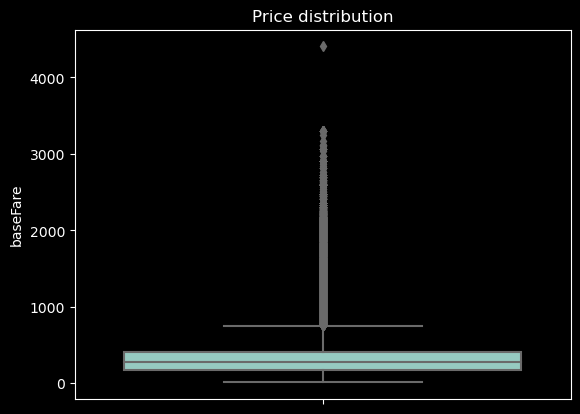

In [41]:
sns.boxplot(data=df, y = 'baseFare')
plt.title("Price distribution");

In [ ]:
#df['arrivalTime'].astype(str).str[:2].value_counts().sort_values()
df['arrivalTime'].astype(int).value_counts().sort_index()


Flugzeiten

In [ ]:
df['depatureTime'].astype(int).value_counts().sort_index().plot(kind='line', figsize=(10, 6))

plt.xlabel('Stunden', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.title("Häufigkeit der Abfluszeitenszeiten", fontsize=20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


In [ ]:
df['arrivalTime'].astype(int).value_counts().sort_index().plot(kind='line', figsize=(10, 6))

plt.xlabel('Stunden', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.title("Häufigkeit der Ankunftszeiten", fontsize=20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


In [ ]:
nonStop = df_desired_columns.loc[df['isNonStop'] == True, ['segmentsAirlineName', 'baseFare']]
plt.figure(figsize=(10, 10))
plt.xlabel("Airline", fontsize=15)
plt.ylabel("Price", fontsize=15)

# Use a modern color palette from seaborn
colors = sns.color_palette("Set2")

plt.scatter(nonStop['segmentsAirlineName'], nonStop['baseFare'], color=colors[0], alpha=0.3)

plt.title("Airline Vs Price", fontsize=20)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Flugpreis", fontsize=15)
plt.xlabel("Airline", fontsize=15)

plt.tight_layout()
plt.show()



Auswirkung der Flugzeugtypen auf den Preis

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x='segmentsEquipmentDescription',y="baseFare", data=df_desired_columns, palette='Blues',scale= "count")
ax.set_title("Anzahl der Flugzeugtypen und Flugpreise",  fontsize = 20)
ax.set_ylabel("Flugpreis", fontsize = 15)
ax.set_xlabel("Flugzeugtypen", fontsize = 15)
plt.show()

In [ ]:
print("Wie viele verschiedene Aircraft kombinationen gibt es?")
print(df['segmentsAirlineName'].nunique())



In [ ]:
print("Anzahl an NonStop Flügen in den Daten:")
print(df['isNonStop'].sum())

In [ ]:
print("Teuerster NonStop Flug:")
max_base_fare = df.loc[df['isNonStop'], 'baseFare'].max()
print(max_base_fare)

In [ ]:
print("Günstigster NonStop Flug:")
print( df.loc[df['isNonStop'], 'baseFare'].min())

Untersuchtung der Flughäfen

In [ ]:

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

sns.countplot(x='destinationAirport', data=df, palette='Blues_r', order=df['destinationAirport'].value_counts().index, ax=ax[0]).set(title='Frequenz des Zielflughafens')
sns.countplot(x='startingAirport', data=df, palette='Blues_r', order=df['startingAirport'].value_counts().index, ax=ax[1]).set(title='Frequenz Abflugflughafen')
ax[0].set_xlabel('Zielflughafen', fontsize=12)
ax[0].set_ylabel('Anzahl', fontsize=12)
ax[1].set_xlabel('Abflugflughafen', fontsize=12)
ax[1].set_ylabel('Anzahl', fontsize=12)
plt.tight_layout()
plt.show()

Routen

In [ ]:
top20Routes = df['totalRoute'].value_counts()[:20]

plt.figure(figsize=(15,7))
chart=sns.countplot(y='totalRoute',data=df,palette='Blues', order = top20Routes.index)
plt.title("Häufigste Flugrouten",
          fontsize='20')
plt.xlabel('Anzahl Flüge', fontsize=12)
plt.ylabel('Flugroute', fontsize=12)



Verteilung der Stopps und Flugpreise

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="totalStops",y="baseFare", data=df_desired_columns, palette='Blues',scale= "count")
ax.set_title("Anzahl der Stopps und Flugpreise",  fontsize = 20)
ax.set_ylabel("Flugpreis", fontsize = 15)
ax.set_xlabel("Anzahl der Stopps", fontsize = 15)
plt.show()

In [ ]:
#plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='totalTravelDistance', y='baseFare', hue='isBasicEconomy', palette='hls')
plt.xlabel("Distance", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

In [ ]:
# Ermitteln Sie das Maximum aus Spalte A, wenn Spalte B True ist
max_value = df.loc[df['isBasicEconomy'] == True, 'baseFare'].max()

# Zeigen Sie das Ergebnis an
print('Der teuerste Economy FLug beträgt:' , max_value, 'USD.')

Untersuchung der Wochentage

In [ ]:
from matplotlib.lines import Line2D
#plt.figure(figsize=(10,10))
plt.xlabel("WochenTag", fontsize=15)
plt.ylabel("Flugpreis", fontsize=15)
sns.lineplot(data=df, x='flightDateDay', y='baseFare', color='blue')
sns.lineplot(data=df, x='searchDateDay', y='baseFare', color='pink')
plt.title("Effekt des Wochentages", fontsize=20)
# Create custom legend labels with name and color
custom_legend = [
    Line2D([0], [0], color='blue', lw=2, label='Tag des Fluges'),
    Line2D([0], [0], color='pink', lw=2, label='Tag der Suche')
]

plt.legend(handles=custom_legend, fontsize=12)

plt.show()

Auswirkungen der verbleibenden Tage auf den Preis

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df["daysLeft"], df["baseFare"], s=30, color='blue', alpha=0.5)

plt.title("Auswirklungen der verbleibenden Tage auf den Preis", fontsize=15)
plt.xlabel("Verbleibende Tage", fontsize=12)
plt.ylabel("Preis", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()


In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("verbleibende Tage", fontsize=15)
plt.ylabel("Preis", fontsize=15)
sns.lineplot(data=df, x='daysLeft', y='baseFare', color='blue')
plt.title("Auswirklungen der verbleibenden Tage auf den Preis", fontsize=20)
plt.show()

## Korrelation

Zunächst werden alle Features wegeschmissen die wir bereits encoded haben, da keine Korrelation zwischen ihnen ausgerechnet werden kann. Folgend werden somit nur noch die encodeden Werte betrachtet.

In [42]:
df_desired_columns = df_desired_columns.drop('segmentsAirlineName', axis=1)
df_desired_columns = df_desired_columns.drop('segmentsEquipmentDescription', axis=1)
df_desired_columns = df_desired_columns.drop('startingAirport', axis=1)
df_desired_columns = df_desired_columns.drop('destinationAirport', axis=1)
df_desired_columns = df_desired_columns.drop('flightDateDay', axis=1)
df_desired_columns = df_desired_columns.drop('searchDateDay', axis=1)

Anschließend beinhaltet unser DataFrame 36 Features.

bool(1), float64(8), int32(21), int64(3), object(3)

In [43]:
df_desired_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698528 entries, 0 to 757384
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   baseFare                      698528 non-null  float64
 1   travelDurationMinutes         698528 non-null  int64  
 2   daysLeft                      698528 non-null  int32  
 3   isBasicEconomy                698528 non-null  bool   
 4   seatsRemaining                698528 non-null  int64  
 5   totalTravelDistance           698528 non-null  float64
 6   arrivalTime                   698528 non-null  float64
 7   depatureTime                  698528 non-null  float64
 8   flightDay                     698528 non-null  object 
 9   flightMonth                   698528 non-null  object 
 10  searchDay                     698528 non-null  object 
 11  totalStops                    698528 non-null  int64  
 12  flightDateDay_Friday          698528 non-nul

 Eine hohe Korrelation zwischen zwei oder mehreren Features kann auf Multikollinearität hinweisen. Folgend untersuchen wir die Matrix auf die Matrix überprüfen und nach starken positiven oder negativen Korrelationen suchen.

In [44]:
# Korrelationsmatrix erstellen
corr_matrix = df_desired_columns.corr()

# Alle Features in der Korrelationsmatrix anzeigen
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(corr_matrix)

C:\Users\maris\AppData\Local\Temp\ipykernel_7268\4050732824.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_desired_columns.corr()


                              baseFare  travelDurationMinutes  daysLeft  \
baseFare                      1.000000               0.410549  0.039189   
travelDurationMinutes         0.410549               1.000000 -0.005765   
daysLeft                      0.039189              -0.005765  1.000000   
isBasicEconomy               -0.247626              -0.071673 -0.018276   
seatsRemaining               -0.077633              -0.120450  0.197154   
totalTravelDistance           0.446810               0.700051 -0.010467   
arrivalTime                   0.049607               0.054406 -0.007080   
depatureTime                 -0.012212              -0.023857  0.012863   
totalStops                    0.343817               0.753290 -0.029807   
flightDateDay_Friday          0.036573              -0.001933 -0.016169   
flightDateDay_Monday          0.034624              -0.001596  0.015879   
flightDateDay_Saturday       -0.007322               0.008228  0.012270   
flightDateDay_Sunday     

# Todo beschreiben

### Heatmap der Korrelationnsmatrix

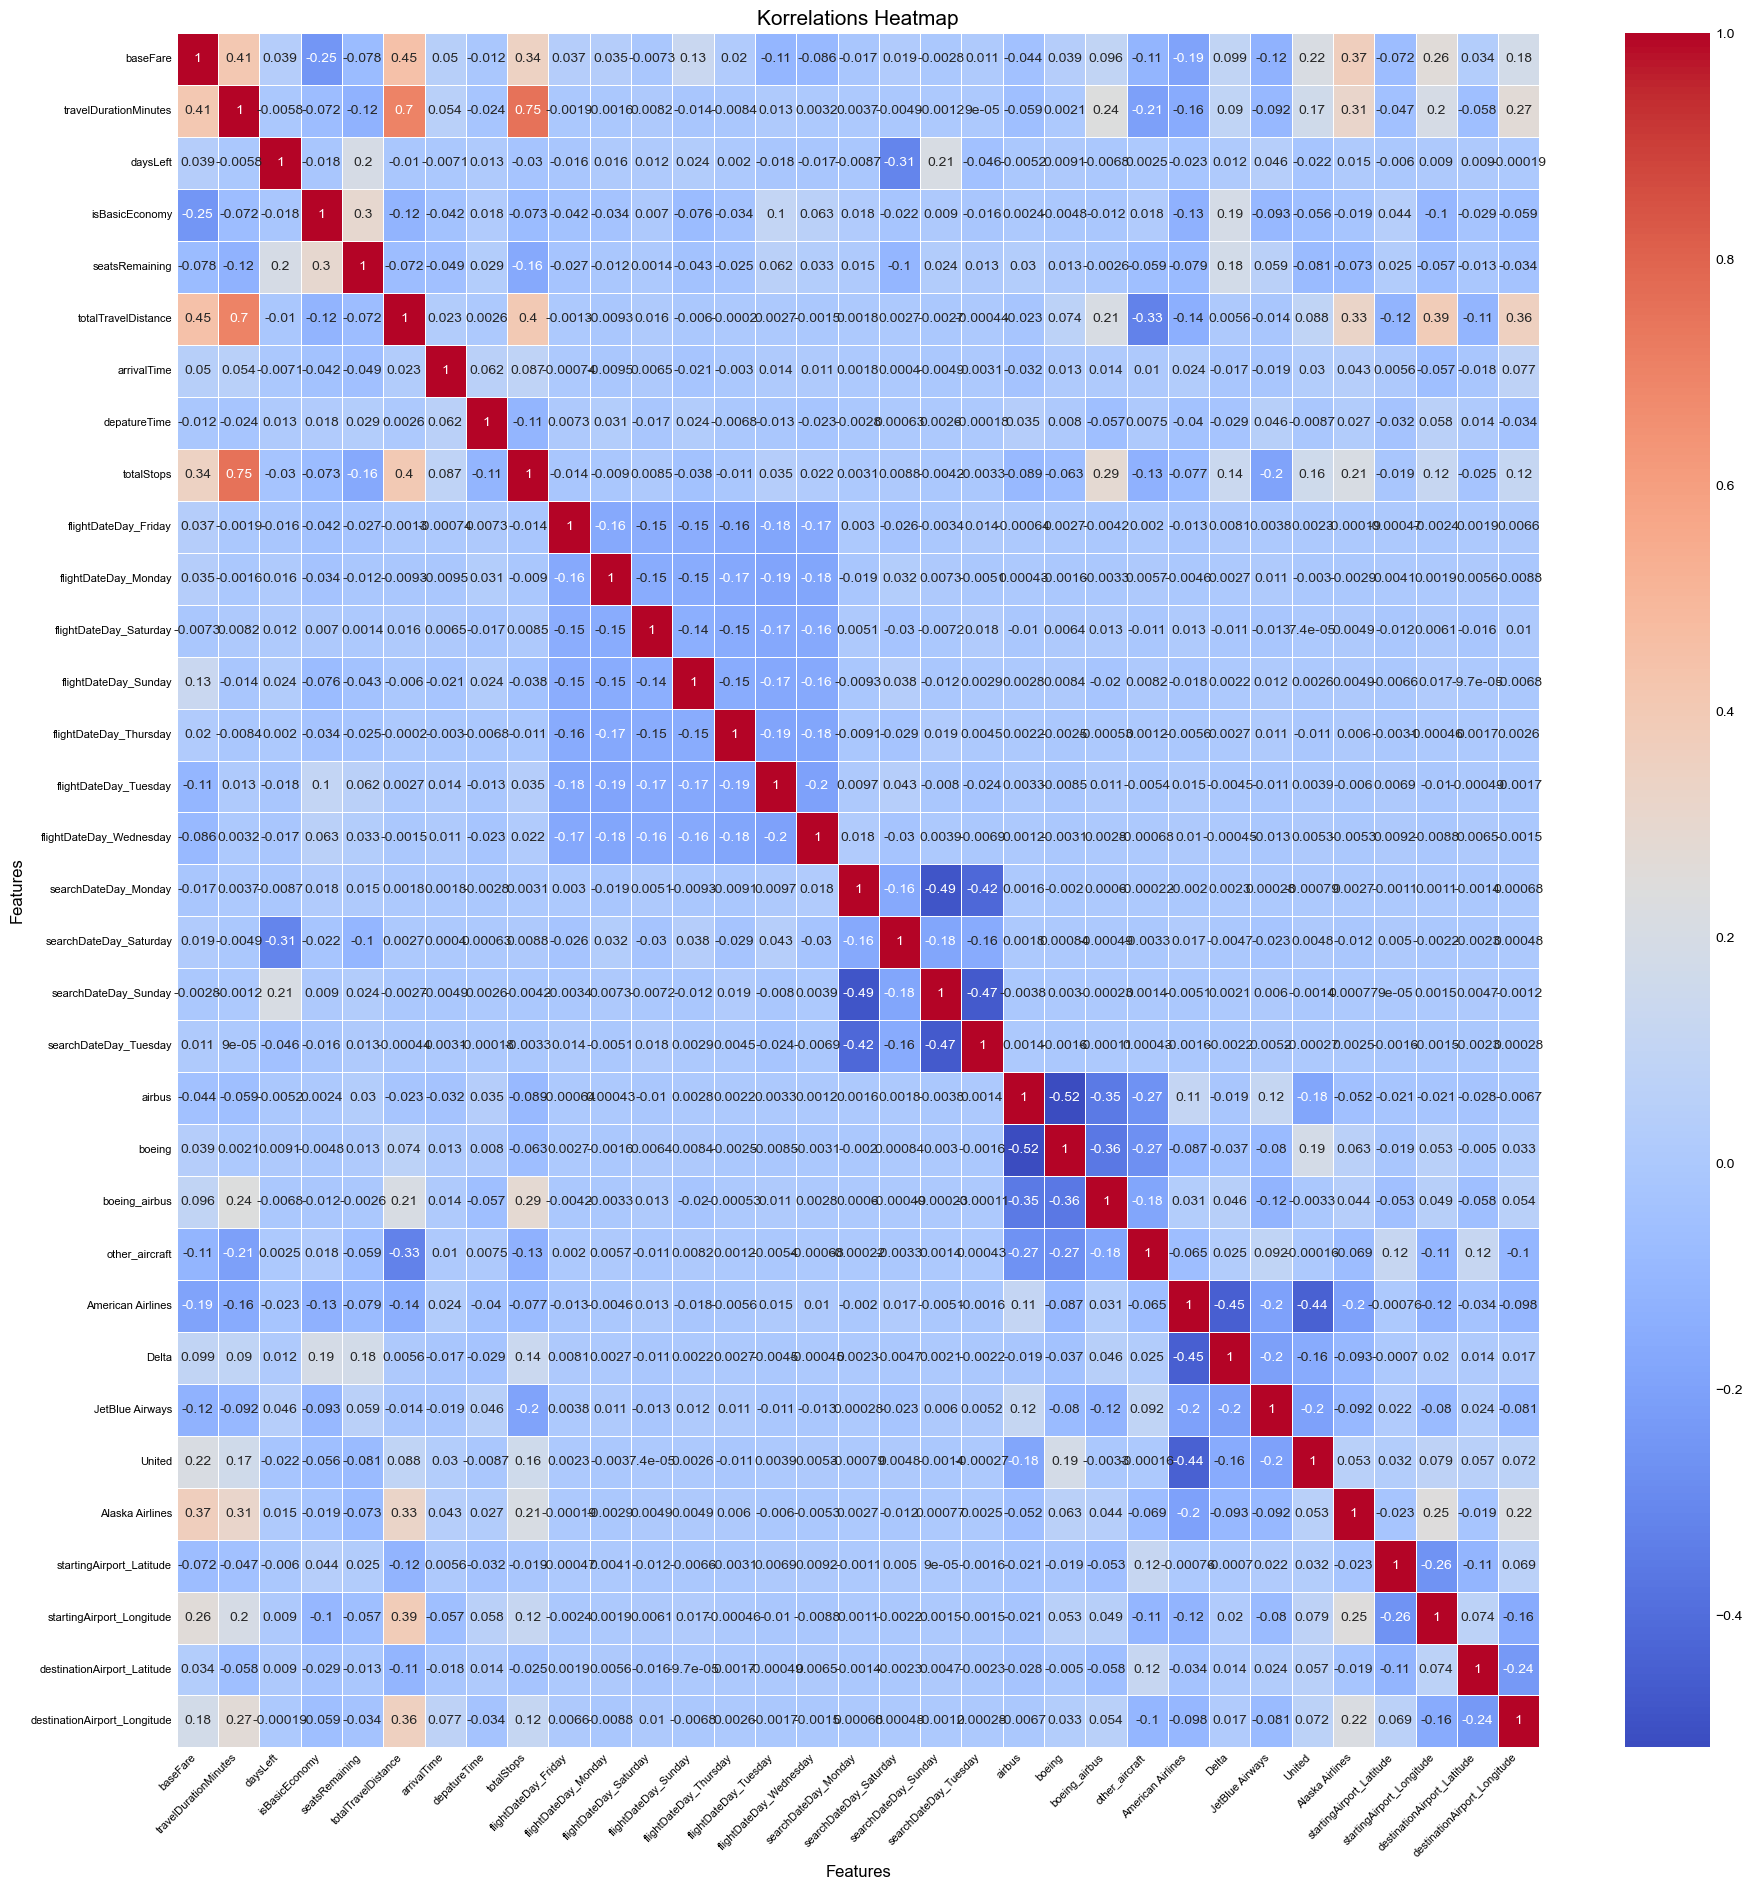

In [55]:
# Set the style to a customized style
custom_style = {
    'axes.facecolor': 'lightgray',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'black',
    'text.color': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
}

plt.style.use(custom_style)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(19, 19))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelations Heatmap", fontsize=15)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
df_desired_columns.info()

#### Aussortieren von Feature, da die correlation kleiner als 0,001 ist.

Zwischen 'baseFare' und 'searchDateDay_Sunday' ist eine Korrelation von  -0.002775.

Zwischen 'baseFare' und 'flightDateDay_Saturday ' ist eine Korrelation von -0.007322.

Beide Werte werden folgend nicht mehr betrachtet.

In [49]:
df_desired_columns= df_desired_columns.drop('searchDateDay_Sunday', axis=1)
df_desired_columns= df_desired_columns.drop('flightDateDay_Saturday', axis=1)

In [61]:
df_desired_columns.info()
df_desired_columns.head(5)
df_desired_columns.isnull().sum()
df_desired_columns.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698528 entries, 0 to 757384
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   baseFare                      698528 non-null  float64
 1   travelDurationMinutes         698528 non-null  int64  
 2   daysLeft                      698528 non-null  int32  
 3   isBasicEconomy                698528 non-null  bool   
 4   seatsRemaining                698528 non-null  int64  
 5   totalTravelDistance           698528 non-null  float64
 6   arrivalTime                   698528 non-null  float64
 7   depatureTime                  698528 non-null  float64
 8   flightDay                     698528 non-null  object 
 9   flightMonth                   698528 non-null  object 
 10  searchDay                     698528 non-null  object 
 11  totalStops                    698528 non-null  int64  
 12  flightDateDay_Friday          698528 non-nul

(698528, 34)

## Notizen
Interessante überlegungen zum Datensatz:
a) Ist der Preis je nach Fluggesellschaft unterschiedlich?
b) Wie wirkt sich der Preis aus, wenn die Tickets nur 1 oder 2 Tage vor dem Abflug gekauft werden?
c) Ändert sich der Ticketpreis je nach Abflugzeit und Ankunftszeit?
d) Wie unterscheidet sich der Ticketpreis zwischen Economy und Business Class?

# 6. Model Entwicklung

### Erstellung Datensets

In [76]:
df = df_desired_columns

### Skalierung des Datensatzes

Warum Normalisierung?

je nach Lernverfahren nicht unbedingt nötig

führt in der Praxis oft zu höhere Lerngeschwindigkeit

um Rechenungenauigkeiten zu vermeiden

## TODO 
Die Normalisierung wird angewendet, wenn Sie Ihre Daten so umwandeln möchten, dass sie einer bestimmten Verteilung folgen oder eine bestimmte statistische Eigenschaft aufweisen. Diese Technik wird häufig bei Algorithmen eingesetzt, die von einer Normalverteilung der Merkmale ausgehen, oder beim Vergleich von Merkmalen mit unterschiedlichen Einheiten oder Bereichen.

Normalisierungsmethoden zielen darauf ab, die Merkmale auf einen gemeinsamen Bereich zu skalieren, der in der Regel zwischen 0 und 1 oder -1 und 1 liegt. Dies geschieht durch Subtraktion des Minimalwertes und Division durch den Bereich (Maximalwert minus Minimalwert) jedes Merkmals. Die Normalisierung kann nützlich sein, wenn Sie sich auf die relativen Beziehungen zwischen den Werten und nicht auf deren absolute Größen konzentrieren möchten.

Im Fall der Vorhersage von Flugpreisen kann eine Skalierung oder Normalisierung je nach den spezifischen Merkmalen in Ihrem Datensatz erforderlich sein. Wenn Sie z. B. Merkmale wie die Flugdauer, die zurückgelegte Entfernung und die Anzahl der Zwischenlandungen haben, haben diese Merkmale möglicherweise unterschiedliche Skalen und könnten von einer Skalierung profitieren, um eine faire Gewichtung während des Modelltrainings sicherzustellen. Wenn Sie hingegen Merkmale wie den Monat des Fluges, den Wochentag oder kategorische Variablen wie den Namen der Fluggesellschaft haben, ist eine Normalisierung möglicherweise nicht erforderlich, da diese Merkmale keine inhärenten Skalen oder Größenordnungen haben.

In [108]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

df_normalized = df_desired_columns

# Specify the columns to normalize
columns_to_normalize = ['travelDurationMinutes', 'seatsRemaining',	'totalTravelDistance',	'arrivalTime',	
                        'depatureTime',	'flightDay',	'flightMonth',	'searchDay',	'totalStops', 'startingAirport_Latitude',	
                        'startingAirport_Longitude',	'destinationAirport_Latitude', 'destinationAirport_Longitude']

# Normalize the selected columns
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

df_normalized.head(30)


,baseFare,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,arrivalTime,depatureTime,flightDay,flightMonth,searchDay,totalStops,flightDateDay_Friday,flightDateDay_Monday,flightDateDay_Sunday,flightDateDay_Thursday,flightDateDay_Tuesday,flightDateDay_Wednesday,searchDateDay_Monday,searchDateDay_Saturday,searchDateDay_Tuesday,airbus,boeing,boeing_airbus,other_aircraft,American Airlines,Delta,JetBlue Airways,United,Alaska Airlines,startingAirport_Latitude,startingAirport_Longitude,destinationAirport_Latitude,destinationAirport_Longitude
0,217.67,0.098947,1,False,0.888889,0.220150,0.646735,0.532655,0.533333,0.0,0.0,0.000000,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0.473525,0.261228,1.000000,0.000000
1,217.67,0.099649,1,False,0.333333,0.220150,0.381255,0.266751,0.533333,0.0,0.0,0.000000,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0.473525,0.261228,1.000000,0.000000
2,213.02,0.227368,1,False,0.666667,0.222481,0.522053,0.296438,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0.473525,0.261228,1.000000,0.000000
3,213.02,0.273684,1,False,0.666667,0.222481,0.567006,0.296438,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.473525,0.261228,1.000000,0.000000
4,213.02,0.195088,1,False,0.000000,0.220150,0.430450,0.224343,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.473525,0.261228,1.000000,0.000000
5,213.02,0.301754,1,False,0.222222,0.353535,0.914334,0.609839,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0.473525,0.261228,1.000000,0.000000
6,260.47,0.248421,1,False,0.000000,0.222481,0.722222,0.466921,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0.473525,0.261228,1.000000,0.000000
7,258.60,0.469474,1,True,0.888889,0.220150,0.300254,0.827396,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.473525,0.261228,1.000000,0.000000
8,274.42,0.258947,1,False,0.000000,0.353535,0.729008,0.467345,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.473525,0.261228,1.000000,0.000000
9,274.42,0.264561,1,False,0.000000,0.353535,0.007209,0.743003,0.533333,0.0,0.0,0.333333,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.473525,0.261228,1.000000,0.000000


### Spliting the Data

In [77]:
X = df.drop(columns= "baseFare")
y = df["baseFare"]


In [78]:

# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Splitting normalized Data

In [85]:
X_n = df_normalized.drop(columns= "baseFare")
y_n = df_normalized["baseFare"]


In [86]:
# Daten in Trainings- und Testdaten aufteilen
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

## Berechnung des Baseline Mean Absolute Error (MAE) für die Spalte 'baseFare' im DataFrame 'df

Die Baseline-Methode wird verwendet, um eine Referenzleistung zu erhalten, mit der die Leistung unseres eigentlichen Modells vergliechen werden kann. 
In diesem Fall wird der Baseline-MAE berechnet, indem wir den Durchschnittswert ('y_mean') der 'baseFare'-Spalte nehmen und eine Vorhersage ('y_pred_mae') für alle Datenpunkte im DataFrame erstellen, die diesem Durchschnittswert entsprechen.

Der MAE gibt uns den durchschnittlichen absoluten Unterschied zwischen den tatsächlichen 'baseFare'-Werten und den Baseline-Vorhersagewerten an. 
Wenn unser Modell eine bessere Leistung erzielt, sollte der MAE niedriger sein als der Baseline-MAE.

Der Baseline-MAE ist nützlich, um eine erste Einschätzung der Vorhersageleistung eines Modells zu erhalten. 

Ein niedriger Baseline-MAE, könnte darauf hinweisen, dass die Daten nicht viele variierende Muster enthalten und ein einfacher Durchschnitt als Vorhersage ausreicht. 
In diesem Fall müsste möglicherweise ein komplexeres Modell entwickelt werden, um bessere Vorhersagen zu erzielen.

Ein hoher Baseline-MAE, deutet darauf hin, dass es Muster und Zusammenhänge in den Daten gibt, die von einem Modell erfasst werden könnten. .

Insgesamt dient der Baseline-MAE als Ausgangspunkt für unsere Modellbewertung und hilft uns dabei, unseren Fortschritt und den Mehrwert unseres Modells zu beurteilen.

In [79]:
y_mean = df['baseFare'].mean()
y_pred_mae = [y_mean] * len(df)
y_baseline = mean_absolute_error(df['baseFare'], y_pred_mae)
print("Baseline MAE:", round(y_baseline))


Baseline MAE: 146


Der MAE beträgt 146.
Das bedeutet, dass unsere Baseline-Vorhersagen im Durchschnitt um 146 Einheiten von den tatsächlichen Flugpreisen abweichen.

Um die Leistung unseres Modells zu bewerten, sollten wir sicherstellen, dass der MAE unseres Modells niedriger ist als dieser Baseline-MAE. Ein niedrigerer MAE zeigt an, dass unser Modell genauer ist und eine bessere Vorhersage der Flugpreise liefert.



## Random Forrest

Decision Trees werden sowohl für Regressions- als auch für Klassifikationsprobleme eingesetzt. Sie werden visuell als Baumstruktur dargestellt, wodurch sie ihren Namen erhalten haben. Bei der Regression beginnen Entscheidungsbäume an der Wurzel des Baums und folgen Entscheidungen basierend auf den Werten der Variablen, bis das Ende erreicht wird und ein Ergebnis angegeben wird.
Der Random Forest Regressor kombiniert mehrere Entscheidungsbäume, um Vorhersagen zu treffen. Während des Trainings werden die internen Parameter optimiert, um möglichst genaue Vorhersagen zu erzielen.

**Random-Forest-Regressionsmodell:**
Für das Training unseres Random-Forest-Regressionsmodells haben wir sklearn verwendet. Das Modell verfügt über viele verschiedene Parameter, die verwendet werden können.
Einige wichtige Paramter sind folgende: 

*n_estimators* - Die Anzahl der Entscheidungsbäume, die im Modell verwendet werden (Default = 100)

*max_depth* - Die maximal mögliche Tiefe der einzelnen Bäume

*max_features* - Die maximale Anzahl von Merkmalen, die das Modell bei der Bestimmung eines Splits berücksichtigt

*bootstrap* - Der Standardwert für diesen Parameter ist True, d. h. das Modell folgt den Bootstrapping-Prinzipien (die zuvor definiert wurden)

*max_samples* - Dieser Parameter setzt voraus, dass Bootstrapping auf True gesetzt ist, andernfalls gilt dieser Parameter nicht. Im Falle von True legt dieser Wert die größte Größe jeder Stichprobe für jeden Baum fest.



**Bewertung der Modellleistung mit verschiedenen Fehlermaßen**

Für die Bewertung unserer Modelle haben wir verschiedene Fehlermaße verwendet, um die Qualität der Vorhersagen zu quantifizieren. Die folgenden drei Fehlermaße wurden dabei berücksichtigt: der mittlere quadratische Fehler (MSE), der mittlere absolute Fehler (MAE) und der Root Mean Square Error (RMSE). Jedes dieser Maße hat seine spezifische Bedeutung und trägt zur umfassenden Bewertung der Modellleistung bei.

Der mittlere quadratische Fehler (MSE) misst die durchschnittliche quadratische Differenz zwischen den vorhergesagten und den tatsächlichen Werten. Ein niedriger MSE deutet darauf hin, dass die Vorhersagen im Durchschnitt näher an den tatsächlichen Werten liegen. Ein MSE von Null würde bedeuten, dass das Modell keine Fehler aufweist und perfekte Vorhersagen erzielt.

Der mittlere absolute Fehler (MAE) verwendet die absoluten Werte der Fehler und berechnet den durchschnittlichen absoluten Unterschied zwischen den vorhergesagten und den tatsächlichen Werten. Ein niedriger MAE zeigt an, dass die Vorhersagen im Durchschnitt genauer sind. Der MAE ist robust gegenüber Ausreißern, da er die Fehler ohne Berücksichtigung ihrer Vorzeichen verwendet.

Der Root Mean Square Error (RMSE) ist die Quadratwurzel des MSE und gibt die durchschnittliche Abweichung zwischen den vorhergesagten und den tatsächlichen Werten an. Ähnlich wie der MSE zeigt ein niedriger RMSE an, dass die Vorhersagen im Durchschnitt näher an den tatsächlichen Werten liegen. Der RMSE ist besonders nützlich, wenn größere Fehler stärker gewichtet werden sollen.

Durch die Verwendung dieser drei Fehlermaße erhalten wir einen umfassenden Überblick über die Vorhersageleistung unserer Modelle. Wir können die Stärken und Schwächen der Modelle analysieren und vergleichen, um dasjenige Modell auszuwählen, das die beste Leistung für unsere spezifische Problemstellung bietet.

Es ist wichtig anzumerken, dass die Flugpreise in unseren Trainingsdaten einen breiten Bereich von 8,72 USD bis 4407,44 USD abdecken. Diese große Spannweite spiegelt die Vielfalt der Preise und die Varianz in den Flugdaten wider. Indem wir unsere Fehlermaße mit diesem Kontext in Bezug setzen, können wir die Leistung unserer Modelle besser einschätzen und bewerten, wie gut sie in der Lage sind, die Flugpreise vorherzusagen.

Durch die Verwendung des MSE, MAE und RMSE können wir eine fundierte Bewertung der Modellleistung vornehmen und unsere Ergebnisse präzise und aussagekräftig darstellen.

Um die Auswirkungen von normalisierten und nicht normalisierten Daten zu testen, haben wir den Random Forest mit beiden Datensätzen durchgeführt. Bei dieser Untersuchung stellten wir fest, dass die Performance nahezu identisch war. Allerdings benötigten die skalierten Daten nur die Hälfte der Zeit. Während der Random Forest mit den unskalierten Daten eine Laufzeit von 15 Minuten hatte, benötigte der Random Forest mit den skalierten Daten nur 8 Minuten. Aufgrund dieser Beobachtung empfehlen wir, den Random Forest mit normalisierten Daten durchzuführen.

In [81]:
# Erstellen eines Random Forest regression Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Trainieren des Modelles
rf.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = rf.predict(X_test)

# Evaluierung des Models
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", rf_mae)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)

Mean Absolute Error: 31.839390194015486
Mean Squared Error: 4248.974694977269
Root Mean Squared Error: 65.18415984713823


In [91]:
# Erstellen eines Random Forest regression Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Trainieren des Modelles
rf.fit(X_train_n, y_train_n)

# Vorhersagen auf dem Testset
y_pred_n = rf.predict(X_test_n)

# Evaluierung des Models
rf_mae_n = mean_absolute_error(y_test_n, y_pred_n)
rf_mse_n = mean_squared_error(y_test_n, y_pred_n)
rf_rmse_n = mean_squared_error(y_test_n, y_pred_n, squared=False)

print("Mean Absolute Error der normalisierten Daten:", rf_mae_n)
print("Mean Squared Error der normalisierten Daten::", rf_mse_n)
print("Root Mean Squared Error der normalisierten Daten::", rf_rmse_n)

Mean Absolute Error der normalisierten Daten: 31.859528927987768
Mean Squared Error der normalisierten Daten:: 4251.19630672046
Root Mean Squared Error der normalisierten Daten:: 65.20119866015087


Anschließend möchten wir den Einfluss unserer Decision trees

In [115]:
# Erstellen eines Random Forest Regression Models
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Trainieren des Models mit Ausgabe der einzelnen Trainingsschritte
rf.fit(X_train_n, y_train_n)

# Iteriere über jeden Entscheidungsbaum im Random Forest
for i, tree in enumerate(rf.estimators_):
    if (i+1) % 20 == 0:  # Prüfe, ob der aktuelle Baum ein Vielfaches von 20 ist
        # Ausgabe des Entscheidungsbaums
        print(f"Entscheidungsbaum {i+1}:")
        # Hier kannst du weitere Anpassungen oder Ausgaben für jeden Baum durchführen
        # Zum Beispiel: tree.feature_importances_ für die Feature Importance jedes Baumes

        # Vorhersagen auf dem Trainingsset
        y_pred_train_n = tree.predict(X_train_n)

        # Evaluierung des aktuellen Entscheidungsbaums auf dem Trainingsset
        rf_mae_train_n = mean_absolute_error(y_train_n, y_pred_train_n)
        rf_mse_train_n = mean_squared_error(y_train_n, y_pred_train_n)
        rf_rmse_train_n = mean_squared_error(y_train_n, y_pred_train_n, squared=False)

        # Ausgabe der Evaluierungsergebnisse
        print("Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset):", rf_mae_train_n)
        print("Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset):", rf_mse_train_n)
        print("Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset):", rf_rmse_train_n)

# Vorhersagen auf dem Testset
y_pred_n = rf.predict(X_test_n)

# Evaluierung des Random Forest-Modells auf dem Testset
rf_mae_n = mean_absolute_error(y_test_n, y_pred_n)
rf_mse_n = mean_squared_error(y_test_n, y_pred_n)
rf_rmse_n = mean_squared_error(y_test_n, y_pred_n, squared=False)

# Ausgabe der Evaluierungsergebnisse des Random Forest-Modells
print("Mean Absolute Error des Random Forest-Modells (Testset):", rf_mae_n)
print("Mean Squared Error des Random Forest-Modells (Testset):", rf_mse_n)
print("Root Mean Squared Error des Random Forrest-Modells (Testset):", rf_rmse_train_n)



Entscheidungsbaum 20:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.863939569606547
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3849.985490130692
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 62.04825130598518
Entscheidungsbaum 40:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.856258385794888
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3710.3309928654453
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 60.91248634611335
Entscheidungsbaum 60:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.78728368633782
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3745.184076041687
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 61.1979090822692
Entscheidungsbaum 80:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.945590129872407
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3834.0041224660954
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 61.919335610664426
Entscheidungsbaum 100:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.587713906344835
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3748.5469176552424
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 61.225378052366835
Entscheidungsbaum 120:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.758736569963254
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3736.3605459277173
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 61.12577644437506
Entscheidungsbaum 140:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.73399454336466
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3694.6856530614746
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 60.783925943142854
Entscheidungsbaum 160:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.723875169851354
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3747.3498369966737
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 61.2156012548817
Entscheidungsbaum 180:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.651019479070865
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3667.3706312059708
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 60.558819598849276
Entscheidungsbaum 200:


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Mean Absolute Error des aktuellen Entscheidungsbaums (Trainingsset): 16.887857027819244
Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 3976.3090912619473
Root Mean Squared Error des aktuellen Entscheidungsbaums (Trainingsset): 63.05798197898461
Mean Absolute Error des Random Forest-Modells (Testset): 31.680874009154405
Mean Squared Error des Random Forest-Modells (Testset): 4215.795880365854
Root Mean Squared Error des Random Forrest-Modells (Testset): 63.05798197898461


In unserem Fall beträgt der MSE 4251.19630672046. Dies bedeutet, dass die durchschnittliche quadratische Abweichung zwischen den tatsächlichen Flugpreisen und den Vorhersagen unseres Modells  4251  beträgt.


Mean Absolute Error der normalisierten Daten: 31.859528927987768

Mean Squared Error der normalisierten Daten:: 4251.19630672046

Root Mean Squared Error der normalisierten Daten:: 65.20119866015087

## Feature Importance

In [94]:
#from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest regressor
#model = RandomForestRegressor()

# Fit the model to your data
#model.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a dataframe to display the feature importances
importance_df = pd.DataFrame({'Feature': X_train_n.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(importance_df)

                         Feature  Importance
4            totalTravelDistance    0.306965
0          travelDurationMinutes    0.067196
28               Alaska Airlines    0.064012
5                    arrivalTime    0.059569
30     startingAirport_Longitude    0.045055
25                         Delta    0.043277
2                 isBasicEconomy    0.042045
32  destinationAirport_Longitude    0.040288
10                    totalStops    0.040183
27                        United    0.037975
1                       daysLeft    0.035899
6                   depatureTime    0.033133
31   destinationAirport_Latitude    0.031924
7                      flightDay    0.027254
29      startingAirport_Latitude    0.026914
24             American Airlines    0.022221
13          flightDateDay_Sunday    0.015637
3                 seatsRemaining    0.013911
21                        boeing    0.006240
12          flightDateDay_Monday    0.005327
15         flightDateDay_Tuesday    0.004198
20        

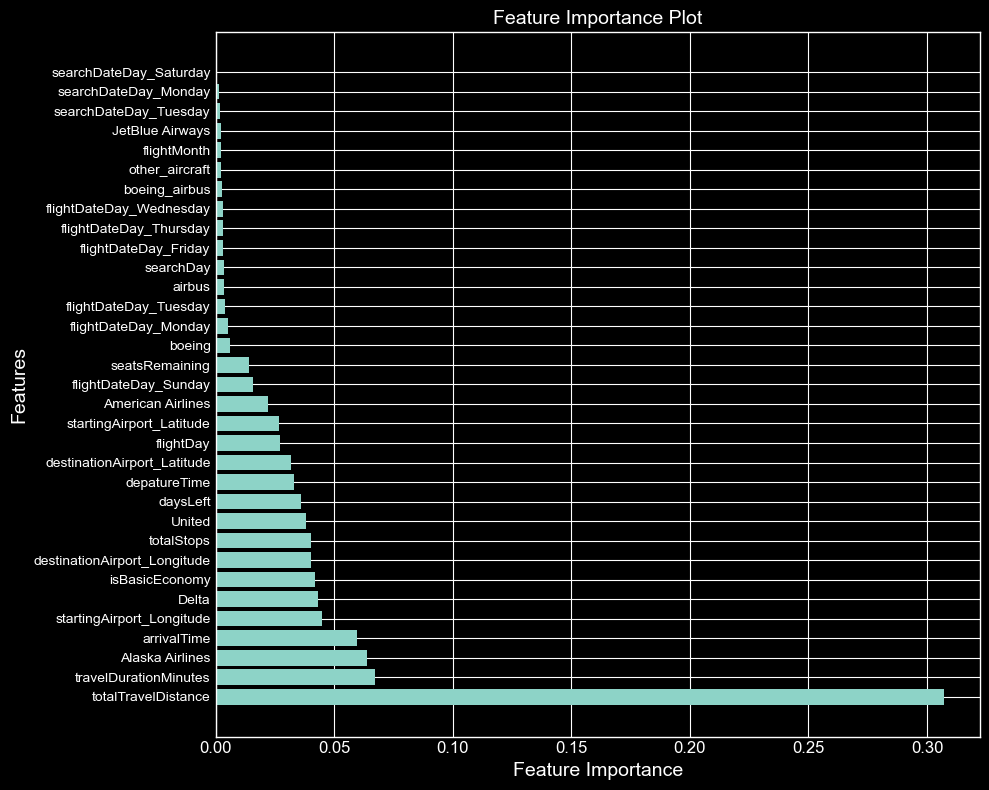

In [101]:
# Erstellen das Balkendiagramm
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance Plot', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()


#### Extrahieren der wichtigsten Features

Die Analyse der Feature Importance hat gezeigt, dass einige Features einen geringen Einfluss auf den Flugpreis haben. Um die Modellkomplexität zu reduzieren und potenzielles Overfitting zu vermeiden, möchten wir nun nur die 17 wichtigsten Features extrahieren und untersuchen, wie sich diese Auswahl auf unsere Vorhersagen auswirkt. Durch die Fokussierung auf die entscheidenden Features können wir möglicherweise eine effizientere Modellierung erreichen und die Vorhersagegenauigkeit verbessern.
Wir haben uns für die 17 wichtigsten entschieden, da nach 17 die importance unter 0,01 fällt. Somit konnten wir so einen sauberen Cut ziehen.

In [114]:
# Speichern der 17 wichtigsten features in einem Data Frame
top_features = importance_df.head(17)['Feature'].tolist()

# Anschließend haben wir unseren normalisierten Datensatz auf die ausgewählten Features reduziert.
X_train_reduced = X_train_n[top_features]
X_test_reduced = X_test_n[top_features]

# Anschließend werden wir mit den reduzierten Datensatz die Hyperparameter näher untersuchen 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Aufteilung des Validierungsdatensatzes in Validierungs- und Testdatensatz
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
# Definiere die Hyperparameter, die du ausprobieren möchtest
param_grid = {
    'n_estimators': [100, 200, 300],  # Anzahl der Entscheidungsbäume
    'max_depth': [None, 5, 10],  # Maximale Tiefe der Bäume
    'min_samples_split': [2, 5, 10],  # Minimale Anzahl von Samples für eine Aufteilung
    # Weitere Hyperparameter, die du anpassen möchtest
}

# Erstelle ein Random Forest-Modell
rf = RandomForestRegressor(random_state=42)

# Definiere die Cross Validation-Strategie (z.B. KFold mit 5 Folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Erstelle ein GridSearchCV-Objekt mit dem Random Forest-Modell, den Hyperparametern und der Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

# Führe die Grid Search durch
grid_search.fit(X_train, y_train)

# Finde die besten Hyperparameter
best_params = grid_search.best_params_
print("Beste Hyperparameter:", best_params)

# Trainiere das Random Forest-Modell mit den besten Hyperparametern
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluierung auf dem Validierungsset
y_pred_val = best_rf.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
print("Mean Squared Error (Validation):", mse_val)
print("Root Mean Squared Error (Validation):", rmse_val)

# Evaluierung auf dem Testset
y_pred_test = best_rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Mean Squared Error (Test):", mse_test)
print("Root Mean Squared Error (Test):", rmse_test)


## Lineare Regression

In [109]:
# Instanz eines linearen Regressionsmodells
model = LinearRegression()

# Training
model.fit(X_train_n, y_train_n)

# Vorhersagen für die Testdaten
y_pred_n_lr = model.predict(X_test_n)

# Bewertung der Vorhersageleistung
mse_n_lr = mean_squared_error(y_test_n, y_pred_n_lr)
mae_n_lr = mean_absolute_error(y_test_n, y_pred_n_lr)
print("Mean Squared Error mit normalisierten Werten:", mse_n_lr)
print("Mean Absolute Error mit normalisierten Werten:", mae_n_lr)

Mean Squared Error mit normalisierten Werten: 29846.539997987307
Mean Absolute Error mit normalisierten Werten: 97.72757161161942


In [110]:


# Instanz eines linearen Regressionsmodells
model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Vorhersagen für die Testdaten
y_pred_lr = model.predict(X_test)

# Bewertung der Vorhersageleistung
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)

Mean Squared Error: 29846.53999798731
Mean Absolute Error: 97.72757161161948


# Quellen

https://towardsdatascience.com/random-forest-regression-5f605132d19d
https://statisticsbyjim.com/regression/mean-squared-error-mse/
https://www.statisticshowto.com/mean-error/
https://de.statista.com/statistik/lexikon/definition/303/root_mean_square_error/
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#:~:text=A%20random%20forest%20regressor.%20A%20random%20forest%20is,to%20improve%20the%20predictive%20accuracy%20and%20control%20over-fitting.
